Zadanie:
1. Sprawdź wyniki klasyfikatora dla różnych wartości test_size (0.2, 0.4, 0.6, 0.8)
2. Sprawdź wyniki klasyfikatora dla różnych kerneli ('linear', 'poly', 'rbf')
3. Przedstaw wszystko na jednym wykresie, gdzie na os X będzie test_size a na osi Y accuracy. Wykres każdego z kerneli powinien być zaznaczony innym kolorem.
4. Sprawozdanie powinno zawierać następujące punkty:
    - prezentacja zbioru, 1-2 zdania oraz dowolne inne podsumowania
    - prezentacja pracy własnej, punkty 1-3
    - własne wnioski

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
#wczytaj plik heart.csv
df=pd.read_csv('./datasets/heart.csv')

In [3]:
df

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [4]:
df.describe()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trtbps    303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalachh  303 non-null    int64  
 8   exng      303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slp       303 non-null    int64  
 11  caa       303 non-null    int64  
 12  thall     303 non-null    int64  
 13  output    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [6]:
df.isna().sum()

age         0
sex         0
cp          0
trtbps      0
chol        0
fbs         0
restecg     0
thalachh    0
exng        0
oldpeak     0
slp         0
caa         0
thall       0
output      0
dtype: int64

In [7]:
X = df.drop(['output'],axis=1)
X = np.array(X)
y = df['output']
y = np.array(y)

In [8]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn import metrics 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.7) #podział na dane treningowe i testowe

model = SVC(kernel = 'rbf') #stworzenie klasyfikatora

model.fit(X_train, y_train) #trenowanie klasyfikatora

y_pred = model.predict(X_test) #predykcja na danych testowych

acc = accuracy_score(y_test, y_pred) #policzenie accuracy
print(acc)
#sprawdzić różne kernele i test size

0.596244131455399


In [15]:
def classification(X, y, kernel, train_size):
    X_train, X_test, y_train, y_test = train_test_split(X, y, train_size= train_size, random_state=42)
    model = SVC(kernel = kernel)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    return accuracy_score(y_test, y_pred)

In [16]:
train_sizes=[0.2, 0.4, 0.6, 0.8]
kernels = ['linear', 'poly', 'rbf', 'sigmoid']

In [17]:
for kernel in kernels:
    for train_size in train_sizes:
        print(kernel, train_size, classification(X, y, kernel, train_size))

linear 0.2 0.757201646090535
linear 0.4 0.8296703296703297
linear 0.6 0.8524590163934426
linear 0.8 0.8688524590163934
poly 0.2 0.6378600823045267
poly 0.4 0.6868131868131868
poly 0.6 0.7295081967213115
poly 0.8 0.7704918032786885
rbf 0.2 0.6419753086419753
rbf 0.4 0.6648351648351648
rbf 0.6 0.7213114754098361
rbf 0.8 0.7049180327868853
sigmoid 0.2 0.551440329218107
sigmoid 0.4 0.5494505494505495
sigmoid 0.6 0.5737704918032787
sigmoid 0.8 0.5245901639344263


In [12]:
from sklearn.metrics import confusion_matrix
from sklearn import metrics 
cm = confusion_matrix (y_test , y_pred)
cm

array([[53, 40],
       [46, 74]], dtype=int64)

In [13]:
pk = metrics.classification_report(y_test,y_pred)
print(pk)

              precision    recall  f1-score   support

           0       0.54      0.57      0.55        93
           1       0.65      0.62      0.63       120

    accuracy                           0.60       213
   macro avg       0.59      0.59      0.59       213
weighted avg       0.60      0.60      0.60       213



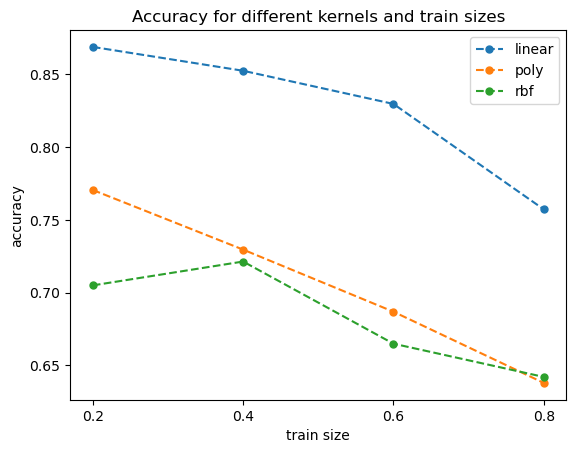

In [14]:
plt.plot(train_sizes, [classification(X, y, 'linear', train_size) for train_size in train_sizes], 'o', label='linear', markersize=5, linestyle='dashed')
plt.plot(train_sizes, [classification(X, y, 'poly', train_size) for train_size in train_sizes], 'o', label='poly', markersize=5, linestyle='dashed')
plt.plot(train_sizes, [classification(X, y, 'rbf', train_size) for train_size in train_sizes], 'o', label='rbf', markersize=5, linestyle='dashed')
plt.xticks(train_sizes)
plt.xlabel('train size')
plt.ylabel('accuracy')
plt.title('Accuracy for different kernels and train sizes')
plt.legend()